In [1]:
import json
import gc
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from pandas import json_normalize #package for flattening json in pandas df

%matplotlib inline

In [51]:
df_dados = pd.read_csv('../app/data/pares.csv').dropna().drop('transicao_movimento',axis=1)
df_mpm_ser = pd.read_csv('../app/data/mpm_serventias.csv', sep=';').set_index('SEQ_ORGAO')[['NOMEDAVARA']]
#df_dados
df_dados = df_dados.merge(df_mpm_ser,left_on="orgaoJulgador.codigoOrgao", right_index=True)
df_dados.columns = ['Tribunal','codOrgao','Quantidade','Tempo mínimo','Tempo máximo','Tempo médio','C1','C2','Movimento 1', 'Movimento Subsequente','Serventia']
#df_codOrgao = pd.read_csv('./base/mpm_serventias.csv')
#df_dados
for i,j in df_dados[['codOrgao','Serventia']].drop_duplicates().values:
    print(i,j)
#for (i,j) in df_dados[['codOrgao','Serventia']].drop_duplicates().values
#    print(i + " - " + j)

3668.0 VARA ÚNICA DA COMARCA DE ARINOS
3786.0 VARA ÚNICA DA COMARCA DE BARROSO
3840.0 VARA ÚNICA DA COMARCA DE ESPERA FELIZ
3867.0 1ª VARA CÍVEL, CRIMINAL E DE EXECUÇÕES CRIMINAIS DA COMARCA DE ARAÇUAÍ
3949.0 2ª VARA CÍVEL, CRIMINAL E DA INFÂNCIA E DA JUVENTUDE DA COMARCA DE OURO FINO
3976.0 VARA ÚNICA DA COMARCA DE ELÓI MENDES
4042.0 1ª VARA CÍVEL, CRIMINAL E DA INFÂNCIA E DA JUVENTUDE DA COMARCA DE BOM DESPACHO
4067.0 VARA ÚNICA DA COMARCA DE PRADOS
4071.0 1ª VARA CÍVEL DA COMARCA DE FRUTAL
4150.0 1ª VARA CÍVEL, CRIMINAL E DE EXECUÇÕES PENAIS DA COMARCA DE ITURAMA
4230.0 VARA ÚNICA DA COMARCA DE RIO PRETO
4301.0 VARA ÚNICA DA COMARCA DE FERROS
4310.0 2ª VARA CÍVEL DA COMARCA DE PIRAPORA
4327.0 1ª VARA CÍVEL DA COMARCA DE GOVERNADOR VALADARES
4347.0 3ª VARA CÍVEL DA COMARCA DE ITAJUBÁ
4376.0 VARA ÚNICA DA COMARCA DE ITAMONTE
4379.0 VARA EMPRESARIAL, DE EXECUÇÕES FISCAIS E DE REGISTROS PÚBLICOS DA COMARCA DE UBERABA
4392.0 VARA ÚNICA DA COMARCA DE JACUTINGA
4411.0 VARA ÚNICA DA COMARCA

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df_dados.groupby('orgaoJulgador.codigoOrgao').size().reset_index(name='count').sort_values('count').tail(20)

KeyError: 'orgaoJulgador.codigoOrgao'

In [5]:
df_dados = df_dados.dropna()
df_serventias = df_dados.merge()

,transicao_movimento,siglaTribunal,orgaoJulgador.codigoOrgao,count,min,max,median,C1,C2,C1-descricao,C2-descricao
0,1051.0 -> 1051.0,TJMG,3668.0,1,0.0,0.0,0.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
1,1051.0 -> 1051.0,TJMG,3786.0,1,209.0,209.0,209.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
2,1051.0 -> 1051.0,TJMG,3840.0,1,0.0,0.0,0.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
3,1051.0 -> 1051.0,TJMG,3867.0,1,15.0,15.0,15.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
4,1051.0 -> 1051.0,TJMG,3949.0,4,31.0,51.0,34.0,1051.0,1051.0,Decurso de Prazo,Decurso de Prazo
...,...,...,...,...,...,...,...,...,...,...,...
35952,982.0 -> 981.0,TJMG,5760.0,1,0.0,0.0,0.0,982.0,981.0,Remessa,Recebimento
35953,982.0 -> 981.0,TJMG,6125.0,1,1.0,1.0,1.0,982.0,981.0,Remessa,Recebimento
35954,982.0 -> 981.0,TJMG,6128.0,1,0.0,0.0,0.0,982.0,981.0,Remessa,Recebimento
35955,982.0 -> 981.0,TJMG,13351.0,1,0.0,0.0,0.0,982.0,981.0,Remessa,Recebimento


In [5]:
df_dados[df_dados['count'] >= 10].sort_values('median')

,transicao_movimento,siglaTribunal,orgaoJulgador.codigoOrgao,count,min,max,median,C1,C2,C1-descricao,C2-descricao
24515,581.0 -> 581.0,TJMG,3920.0,19,0.0,52.0,0.0,581.0,581.0,Documento,Documento
24725,581.0 -> 581.0,TJMG,11364.0,24,0.0,117.0,0.0,581.0,581.0,Documento,Documento
13260,132.0 -> 51.0,TJMG,5760.0,385,0.0,266.0,0.0,132.0,51.0,Recebimento,Conclusão
24785,581.0 -> 60.0,TJMG,3790.0,10,0.0,9.0,0.0,581.0,60.0,Documento,Expedição de documento
24850,581.0 -> 60.0,TJMG,4025.0,38,0.0,4.0,0.0,581.0,60.0,Documento,Expedição de documento
...,...,...,...,...,...,...,...,...,...,...,...
6404,11014.0 -> 85.0,TJMG,5457.0,10,34.0,1675.0,1271.0,11014.0,85.0,Convenção das Partes para Cumprimento Voluntár...,Petição
15844,245.0 -> 22.0,TJMG,5780.0,17,522.0,1995.0,1756.0,245.0,22.0,Provisório,Baixa Definitiva
26761,60.0 -> 36.0,TJMG,6125.0,51,5.0,1896.0,1893.0,60.0,36.0,Expedição de documento,Redistribuição
16054,26.0 -> 118.0,TJMG,5457.0,10,1228.0,2164.0,1897.5,26.0,118.0,Distribuição,Protocolo de Petição


In [57]:
plt.figure(figsize=(20,20))
filtro = df_dados['orgaoJulgador.codigoOrgao'] == 3976
df_pivot = df_dados[filtro].pivot('C1','C2','count')
#sns.heatmap(df_pivot, cmap="YlGnBu", robust=True, annot=True)
#sns.heatmap(df_pivot, cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=30)
#df_dados[filtro].pivot('C1','C2','count')
#df_cross = pd.crosstab(df_dados['C1'], df_dados['C2'])
#df_cross.corr()
df_dados = df_dados.astype({'C1': 'str'})
df_dados = df_dados.astype({'C2': 'str'})
df_dados = df_dados.astype({'orgaoJulgador.codigoOrgao': 'str'})
#display(df_dados.dtypes)
#sns.heatmap(df_cross, cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=30)
sns.heatmap(df_dados[filtro][['C1','C2','median']].pivot(), cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=30)

TypeError: pivot() missing 1 required argument: 'columns'

<Figure size 1440x1440 with 0 Axes>

In [58]:
#plt.figure(figsize=(20,20))
#sns.heatmap(pd.pivot_table(df_dados[filtro], values=['median'], index=['C1'], columns=['C2']), cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=30)

df_dados[filtro][['C1','C2','median']].set_index('C1').sort_index().reset_index(name='C1')


#sns.heatmap(df_pv, cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=300)

TypeError: reset_index() got an unexpected keyword argument 'name'

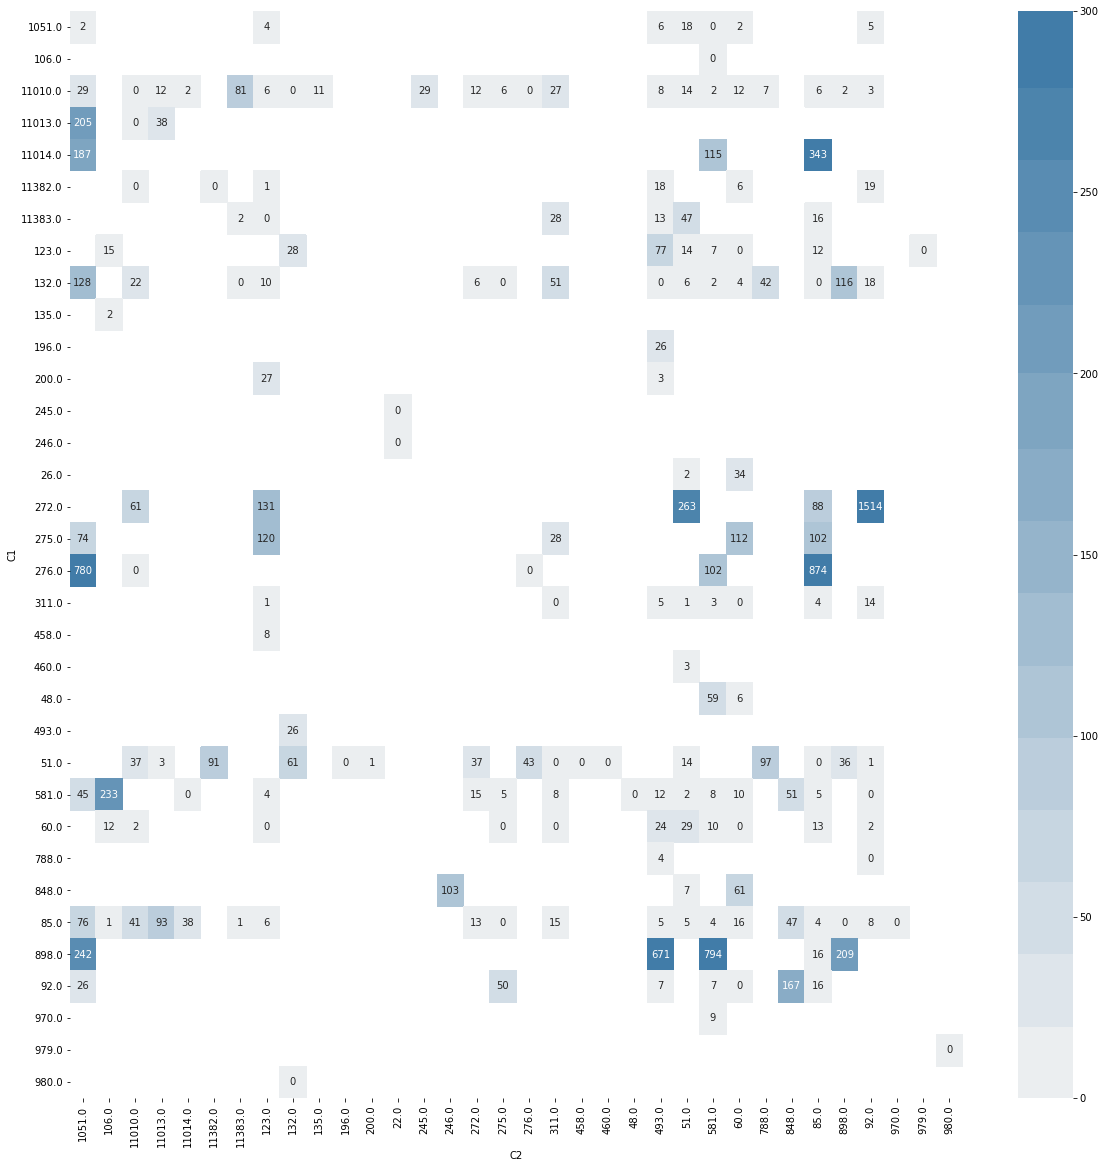

In [61]:
plt.figure(figsize=(20,20))
#filtro = df_dados['median'] <= 100
df_pivot = df_dados[filtro].pivot('C1','C2','median')
#sns.heatmap(df_pivot, cmap="YlGnBu", robust=True, annot=True)

fig = sns.heatmap(df_pivot, cmap=sns.diverging_palette(20, 240, n=30), center = 0, annot=True, fmt=".0f", vmin =0, vmax=300).get_figure()
fig.savefig("output.png")